# COVID-19 Headlines

[The anonymous web service Top.st](top.st) extracts the contemporary most-shared news. The [social-bot Topstbot](https://botsin.space/topst) promotes the top most headline on the [federated social-media platform Mastodon](https://mastodon.io). Assuming, its feed can be regarded as an archive of top relevant news headlines, how did German media react to the COVID-19 numbers?

In [1]:
from scrape import entorb

delay_from_infection_to_symptom = 4 # RKI
delay_from_symptom_to_death = 13

cases = entorb.to_dataframe('DE-total')

In [2]:
cases_new = cases['Cases_New']
high_cases_new = cases_new[(cases_new.shift(1) < cases_new) & (cases_new.shift(-1) < cases_new)]
low_cases_new = cases_new[(cases_new.shift(1) > cases_new) & (cases_new.shift(-1) > cases_new)]

<AxesSubplot:xlabel='Date'>

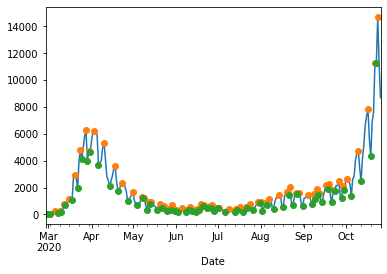

In [3]:
import matplotlib.pyplot as plt
cases_new.plot(kind='line')
high_cases_new.plot(kind='line', linestyle='', marker='o')
low_cases_new.plot(kind='line', linestyle='', marker='o')

In [4]:
import pandas as pd
from scrape import topstbot

nation = 'de'
headlines = topstbot.to_dataframe(since='2020-03-01T00:00:00.000Z', tagged=['day', nation])

#headlines['content'] = [fromstring(h).text_content() for h in headlines['content']]
headlines['date'] = headlines.index.normalize().tz_localize(None)
headlines['text'] = [x.split("\t")[0] for x in headlines['content']]
#headlines['url'] = [x.split("\t")[1].replace('#news #day #de', '') for x in headlines['content']]
headlines = headlines \
.reset_index() \
.set_index('date') \
.drop(columns=['text']) \

In [5]:
# high cases
pd.set_option('display.max_colwidth', 100)
display(headlines \
        .loc[headlines.index.intersection(high_cases_new.index).drop_duplicates()] \
        .set_index('created_at'))

,content,url
created_at,,
2020-06-21 18:00:09.675000+00:00,"<p>&quot;Situation völlig außer Kontrolle“ - Geschäfte geplündert, Straßenschlachten: Hunderte M...",https://botsin.space/@topst/104383277236151951
2020-06-21 06:00:05.721000+00:00,"<p>Corona-Ausbruch bei Tönnies: Zahl der Infizierten steigt auf mehr als 1000\t<a href=""https://...",https://botsin.space/@topst/104380445839944668
2020-06-19 18:00:03.993000+00:00,<p>Junge Frau von zwei Männern ins Auto gezerrt und vergewaltigt - Polizei veröffentlicht Phanto...,https://botsin.space/@topst/104371952277873906
2020-06-19 06:00:04.601000+00:00,<p>Kurz vor berüchtigtem Dog-Meat-Festival - Trotz neuer Regelungen: Chinesischer Tiermarkt verk...,https://botsin.space/@topst/104369121144604783
2020-06-16 18:00:05.612000+00:00,"<p>Mehr als acht Millionen Coronavirus-Fälle weltweit\t<a href=""https://www.t-online.de/nachrich...",https://botsin.space/@topst/104354965455978358
2020-06-16 06:00:13.720000+00:00,"<p>Virus-Ausbruch in Berlin: Drei Mietshäuser stehen unter Quarantäne\t<a href=""https://www.focu...",https://botsin.space/@topst/104352134817667334
2020-06-13 18:00:05.466000+00:00,<p>Es herrscht ein &quot;Kampf biblischen Ausmaßes&quot;: Erzbischof sichert Trump in Offenem Br...,https://botsin.space/@topst/104337978488055166
2020-06-13 06:00:05.893000+00:00,<p>Bundeswehr - &quot;Kommando Spezialkräfte&quot;: Hauptmann schickt Hilferuf an Kramp-Karrenba...,https://botsin.space/@topst/104335147359976763
2020-06-11 18:00:14.956000+00:00,"<p>Deutscher in Südafrika vor den Augen seiner Freundin mit Machete getötet\t<a href=""https://ww...",https://botsin.space/@topst/104326654512193585


# Frankfurter Allgemeine Zeitung

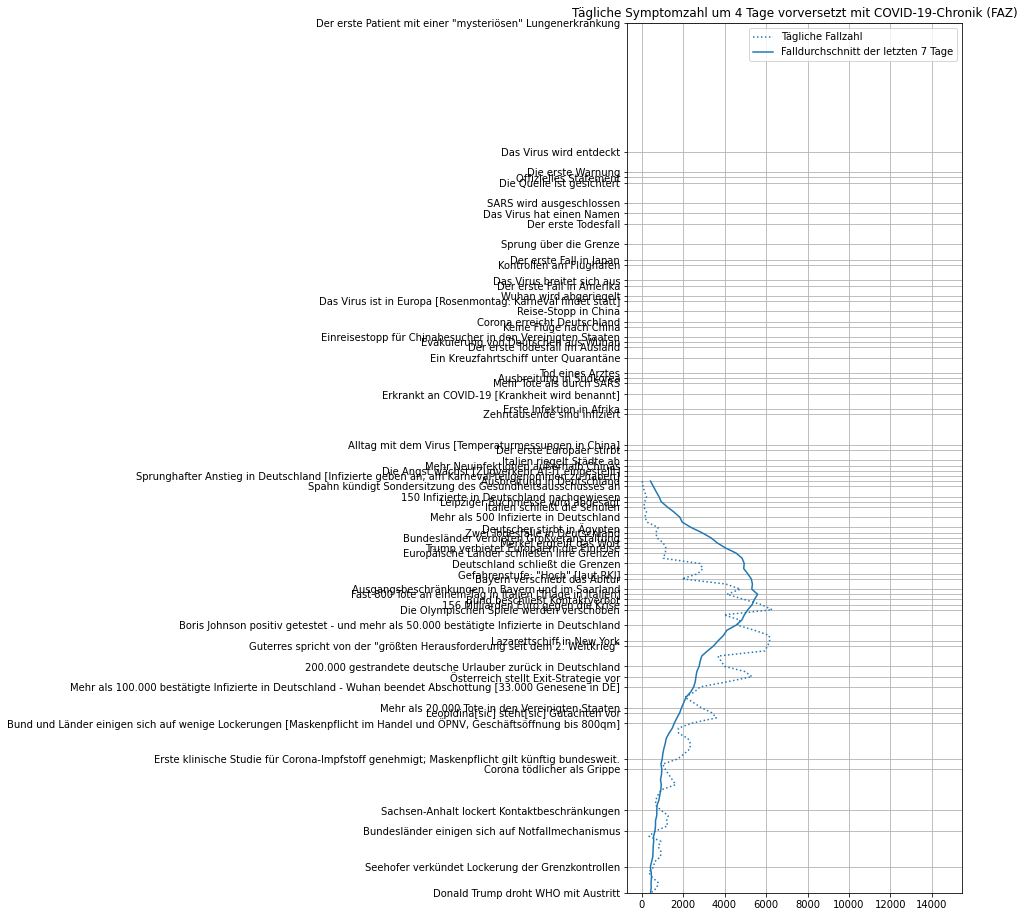

In [6]:
news = pd.read_csv('data/chronic_de.tsv', sep="\t", usecols=['Datum', 'Ereignis'])
news['Datum'] = pd.to_datetime(news['Datum'], format='%Y-%m-%d')
news = news.set_index('Datum')

dt = delay_from_infection_to_symptom #+ delay_from_symptom_to_death
shifted = cases['Cases_New'].sort_index().shift(-dt)

fig, ax = plt.subplots()
ax.plot(shifted,
        shifted.index, 
        linestyle=':',
        label='Tägliche Fallzahl')
ax.plot(shifted.rolling('7D').mean().shift(-delay_from_infection_to_symptom-7),
        shifted.index,
        color=ax.lines[0].get_color(),
        label='Falldurchschnitt der letzten 7 Tage')
ax.set_title("Tägliche Symptomzahl um %d Tage vorversetzt mit COVID-19-Chronik (FAZ)" % dt)
ax.set_yticks(news.index)
ax.set_ylim((news.index.max(), news.index.min()))
ax.set_yticklabels(news['Ereignis'])
ax.grid()
fig.set_size_inches(6,16)
fig.set_facecolor('w')
plt.legend(loc='upper right')
t = ax.set_ylabel('')